In [124]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import GammaRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wilcoxon

Boys Weight Regression

In [79]:
boys_bw_path = '../data/raw/boys_BW_24_42_average.csv'

boys_bw_df = pd.read_csv(boys_bw_path)
boys_bw_df.head(5)

,weeks,3,5,10,50,90,95,97
0,24,0.47,0.49,0.53,0.68,0.87,0.93,0.97
1,25,0.54,0.56,0.60,0.77,0.99,1.06,1.11
2,26,0.61,0.64,0.69,0.88,1.13,1.21,1.26
3,27,0.69,0.73,0.78,1.00,1.28,1.37,1.44
4,28,0.69,0.73,0.78,1.00,1.28,1.37,1.44


In [80]:
# Setting the desired range
start_week = 15
end_week = 23

# Selecting weeks from 15 to 42
selected_data = boys_bw_df[(boys_bw_df['weeks'] >= 15) & (boys_bw_df['weeks'] <= 42)]

new_weeks = list(range(start_week, end_week + 1))
new_data = pd.DataFrame({'weeks': new_weeks})

regression_model = GammaRegressor()

# Training the model
X = selected_data[['weeks']]
centiles = ['3', '5', '10', '50', '90', '95', '97']
for centile in centiles:
    y = selected_data[centile]
    X = selected_data[['weeks']]
    regression_model.fit(X, y)
    
    predicted_values = regression_model.predict(new_data[['weeks']])
    new_data[centile] = predicted_values

result_bw = pd.concat([new_data, selected_data], ignore_index=True)

result_bw = result_bw.round(2)

result_bw.head(5)

,weeks,3,5,10,50,90,95,97
0,15,0.21,0.22,0.24,0.33,0.47,0.51,0.54
1,16,0.23,0.24,0.26,0.37,0.51,0.56,0.59
2,17,0.25,0.27,0.29,0.40,0.56,0.61,0.65
3,18,0.28,0.30,0.32,0.44,0.61,0.66,0.70
4,19,0.31,0.33,0.36,0.49,0.66,0.72,0.77


In [81]:
result_bw.to_csv('../data/output/boys_weight_regression_result.csv', index=False)

In [82]:
def centile_draw(df, label):
        
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(10, 6))
    
    centiles_list = ['3', '5', '10', '50', '90', '95', '97']
    
    for cent in centiles_list:
        # Создаем график для текущего центиля
        sns.lineplot(x='weeks', y=cent, data=df, label=cent)
    
    plt.xlabel('Weeks')
    plt.ylabel(label)
    plt.title(label + ' Centiles')
    plt.legend()
    
    plt.show()

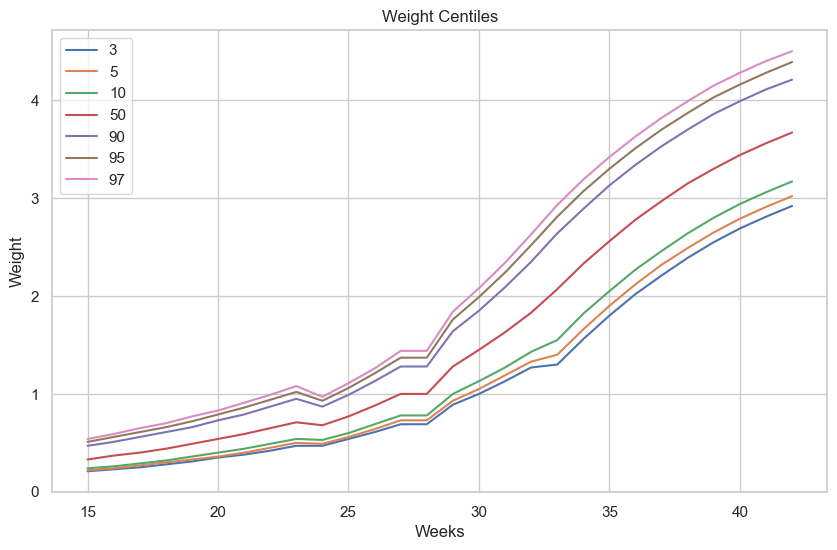

In [83]:
centile_draw(result_bw, 'Weight')

Boys Length Regression

In [84]:
boys_bl_path = '../data/raw/boys_BL_24_42_average.csv'

boys_bl_df = pd.read_csv(boys_bl_path)
boys_bl_df.head(5)

,weeks,3,5,10,50,90,95,97
0,24,27.87,28.47,29.43,32.76,36.09,37.04,37.64
1,25,29.14,29.76,30.70,34.03,37.36,38.30,38.93
2,26,30.41,31.03,31.96,35.30,38.63,39.57,40.19
3,27,31.67,32.29,33.24,36.57,39.90,40.84,41.46
4,28,32.94,33.56,34.51,37.84,41.17,42.13,42.73


In [85]:
# Setting the desired range
start_week = 15
end_week = 23

# Selecting weeks from 15 to 42
selected_data = boys_bl_df[(boys_bl_df['weeks'] >= 15) & (boys_bl_df['weeks'] <= 42)]

new_weeks = list(range(start_week, end_week + 1))
new_data = pd.DataFrame({'weeks': new_weeks})

regression_model = GammaRegressor()

# Training the model
X = selected_data[['weeks']]
centiles = ['3', '5', '10', '50', '90', '95', '97']
for centile in centiles:
    y = selected_data[centile]
    X = selected_data[['weeks']]
    regression_model.fit(X, y)
    
    predicted_values = regression_model.predict(new_data[['weeks']])
    new_data[centile] = predicted_values

result_bl = pd.concat([new_data, selected_data], ignore_index=True)

result_bl = result_bl.round(2)

result_bl.head(5)

,weeks,3,5,10,50,90,95,97
0,15,22.33,22.96,23.97,27.66,31.45,32.51,33.20
1,16,23.02,23.65,24.67,28.34,32.11,33.17,33.86
2,17,23.73,24.37,25.38,29.04,32.79,33.84,34.52
3,18,24.46,25.10,26.11,29.76,33.48,34.52,35.20
4,19,25.22,25.86,26.87,30.49,34.19,35.22,35.90


In [86]:
result_bl.to_csv('../data/output/boys_length_regression_result.csv', index=False)

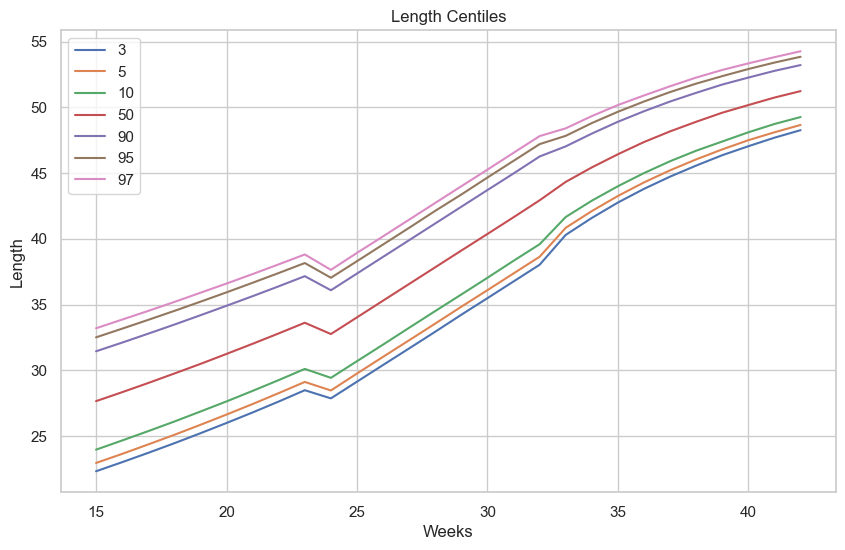

In [87]:
centile_draw(result_bl, 'Length')

Boys Weight/Length Regression

In [88]:
boys_bwl_path = '../data/raw/boys_BWL_24_42_average.csv'

boys_bwl_df = pd.read_csv(boys_bwl_path)
boys_bwl_df.head(5)

,weeks,3,5,10,50,90,95,97
0,24,1.23,1.37,1.59,2.35,3.12,3.33,3.47
1,25,1.35,1.49,1.71,2.47,3.24,3.45,3.59
2,26,1.50,1.64,1.86,2.62,3.39,3.61,3.75
3,27,1.69,1.83,2.04,2.81,3.57,3.79,3.93
4,28,1.69,1.83,2.04,2.81,3.57,3.79,3.93


In [89]:
# Setting the desired range
start_week = 15
end_week = 23

# Selecting weeks from 15 to 42
selected_data = boys_bwl_df[(boys_bwl_df['weeks'] >= 15) & (boys_bwl_df['weeks'] <= 42)]

new_weeks = list(range(start_week, end_week + 1))
new_data = pd.DataFrame({'weeks': new_weeks})

regression_model = GammaRegressor()

# Training the model
X = selected_data[['weeks']]
centiles = ['3', '5', '10', '50', '90', '95', '97']
for centile in centiles:
    y = selected_data[centile]
    X = selected_data[['weeks']]
    regression_model.fit(X, y)
    
    predicted_values = regression_model.predict(new_data[['weeks']])
    new_data[centile] = predicted_values

result_bwl = pd.concat([new_data, selected_data], ignore_index=True)

result_bwl = result_bwl.round(2)

result_bwl.head(5)

,weeks,3,5,10,50,90,95,97
0,15,0.61,0.69,0.82,1.32,1.87,2.03,2.14
1,16,0.66,0.75,0.89,1.42,1.98,2.15,2.26
2,17,0.73,0.82,0.96,1.51,2.10,2.27,2.38
3,18,0.80,0.89,1.05,1.62,2.23,2.40,2.52
4,19,0.87,0.97,1.13,1.73,2.36,2.54,2.66


In [90]:
result_bwl.to_csv('../data/output/boys_weight_length_regression_result.csv', index=False)

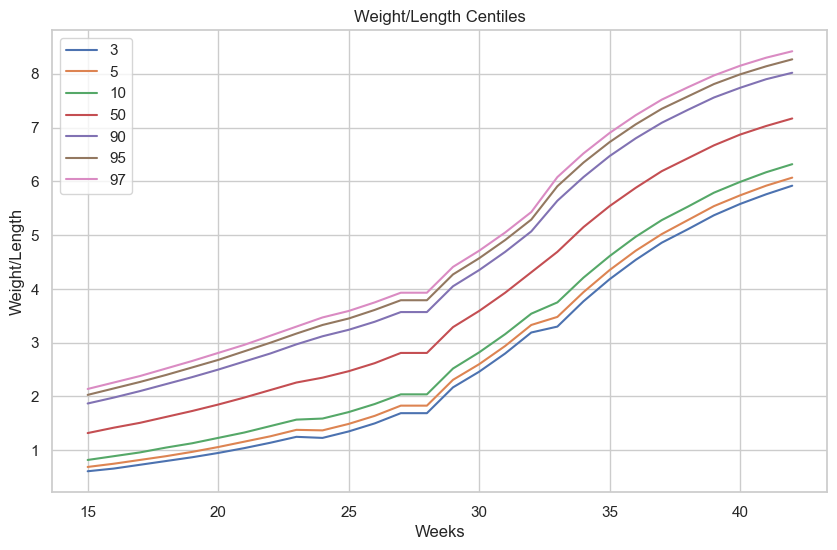

In [91]:
centile_draw(result_bwl, 'Weight/Length')

Comparing the previous results with Kiserud

In [146]:
compare_BW_path = '../data/raw/compare_BW.xlsx'

kiserud_boys_df = pd.read_excel(compare_BW_path, sheet_name='Kiserud_male', skiprows=1)
kiserud_boys_df = kiserud_boys_df.rename(columns={'Unnamed: 0': 'weeks'})
kiserud_boys_df = kiserud_boys_df.loc[kiserud_boys_df['weeks'] != 14]
kiserud_boys_df = kiserud_boys_df.drop(27)
kiserud_boys_df.columns = kiserud_boys_df.columns.astype(str)
kiserud_boys_df = kiserud_boys_df.drop(columns=['25', '75'])
kiserud_boys_df = kiserud_boys_df.set_index(np.arange(len(kiserud_boys_df)))

centile_columns = ['5', '10', '50', '90', '95']

for item in centile_columns:
    kiserud_boys_df[item] /= 1000

kiserud_boys_df.head(30)

,weeks,5,10,50,90,95
0,15,0.096,0.100,0.116,0.134,0.139
1,16,0.121,0.127,0.146,0.169,0.175
2,17,0.152,0.158,0.183,0.210,0.219
3,18,0.188,0.196,0.226,0.260,0.271
4,19,0.232,0.241,0.277,0.320,0.333
5,20,0.282,0.293,0.337,0.389,0.405
6,21,0.341,0.354,0.407,0.469,0.489
7,22,0.408,0.424,0.487,0.561,0.586
8,23,0.484,0.503,0.578,0.666,0.695
9,24,0.570,0.592,0.681,0.785,0.818


In [147]:
result_bw_compare_df = result_bw.copy()
result_bw_compare_df = result_bw_compare_df.loc[result_bw_compare_df['weeks'] < 41]
result_bw_compare_df = result_bw_compare_df.drop(columns=['3', '97'])

result_bw_compare_df.head(30)

,weeks,5,10,50,90,95
0,15,0.22,0.24,0.33,0.47,0.51
1,16,0.24,0.26,0.37,0.51,0.56
2,17,0.27,0.29,0.40,0.56,0.61
3,18,0.30,0.32,0.44,0.61,0.66
4,19,0.33,0.36,0.49,0.66,0.72
5,20,0.36,0.40,0.54,0.73,0.79
6,21,0.40,0.44,0.59,0.79,0.86
7,22,0.45,0.49,0.65,0.87,0.94
8,23,0.50,0.54,0.71,0.95,1.02
9,24,0.49,0.53,0.68,0.87,0.93


In [150]:
# Applying the Wilcoxon test

difference_data = pd.DataFrame(columns=centile_columns)

# Пройдите по каждому элементу и сравните их с помощью критерия Уилкоксона
for centile in centile_columns:
    intergrowth_values = result_bw_compare_df[centile]
    kiserud_values = kiserud_boys_df[centile]
    
    # Выполните сравнение с помощью критерия Уилкоксона
    res = wilcoxon(intergrowth_values, kiserud_values)
    
    # Добавьте результат сравнения в DataFrame
    difference_data.loc['p_value', centile] = res[1]

# Выведите DataFrame с p-значениями
print(difference_data)


                5        10        50        90        95
p_value  0.001298  0.005613  0.783534  0.000052  0.000011
